In [1]:
import pandas as pd  #For Importing and manipulating Dataset
import numpy as np #For numerical operations
import matplotlib.pyplot as plt #For data visualization
import seaborn as sb #For good visualizations
from sklearn.linear_model import LinearRegression # Importing Linear regression
from sklearn.model_selection import train_test_split #For spliting dataset in train test
sb.set()

In [2]:
data = pd.read_csv('data_preprocessed.csv') # importing preprocessed dataset

In [3]:
data.head()

,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,BHK,total_sqft,bath,balcony,price
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1000.0,3.0,2.0,60.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,1760.0,3.0,1.0,115.0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,1875.0,3.0,1.0,167.0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,1500.0,5.0,1.0,85.0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,2065.0,4.0,1.0,210.0


In [4]:
target  = data['price'] #Dependent Variable

In [5]:
inputs = data.drop(['price'], axis =1) #Independent variables

In [6]:
inputs.head()

,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,BHK,total_sqft,bath,balcony
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1000.0,3.0,2.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,1760.0,3.0,1.0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,1875.0,3.0,1.0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,1500.0,5.0,1.0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,2065.0,4.0,1.0


In [7]:
target.head()

0     60.0
1    115.0
2    167.0
3     85.0
4    210.0
Name: price, dtype: float64

In [8]:
x_train,x_test,y_train,y_test = train_test_split(inputs, target, random_state = 42, test_size = 0.2)
# spliting dataset in train test split

In [9]:
x_train.shape

(6500, 243)

In [10]:
x_test.shape

(1626, 243)

### Linear_Regression

In [11]:
reg = LinearRegression()

In [12]:
reg.fit(x_train,y_train) # Training the model

LinearRegression()

#### Checking Score of model

In [13]:
reg.score(x_test,y_test)
#Nearly 87 percent accuracy which is fairly good.

0.860869768076615

#### Testing the Mdel

In [14]:
reg.predict(x_test)

array([ 51.48099765,  66.50757598,  81.07570469, ..., 155.02075909,
        73.29982539,  82.47226668])

C:\Users\Suyash\miniconda33\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

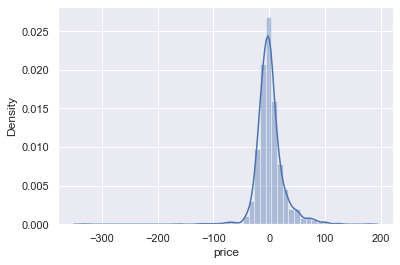

In [15]:
sb.distplot(y_test-reg.predict(x_test))
# As we can see that the error is normally distributed as it should be

In [16]:
y_test = y_test.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)

In [17]:
y_test

0        67.00
1        75.00
2        65.00
3       136.00
4        69.30
         ...  
1621     79.89
1622     75.00
1623    155.00
1624     60.00
1625     65.00
Name: price, Length: 1626, dtype: float64

In [18]:
y_test[5]

80.0

In [19]:
predictions = reg.predict(x_test).round(2)

In [20]:
predictions[5]

101.87

In [21]:
y_test[25]

300.0

In [22]:
predictions[25]

280.89

### Now we will try by scaling the input variable

In [23]:
data_2 = pd.read_csv('data_preprocessed.csv') # importing preprocessed dataset again

In [24]:
data_2.head()

,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,BHK,total_sqft,bath,balcony,price
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1000.0,3.0,2.0,60.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,1760.0,3.0,1.0,115.0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,1875.0,3.0,1.0,167.0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,1500.0,5.0,1.0,85.0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,2065.0,4.0,1.0,210.0


In [25]:
# we will try by scaling total_sqft column
from sklearn.preprocessing import scale #importing library fro scaling

In [26]:
data_2['total_sqft'] = scale(data_2['total_sqft']) 

In [27]:
data_2.head()

,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,BHK,total_sqft,bath,balcony,price
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,-0.571572,3.0,2.0,60.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0.316934,3.0,1.0,115.0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0.451379,3.0,1.0,167.0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,0.012971,5.0,1.0,85.0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0.673506,4.0,1.0,210.0


#### Now spliting dataset in train test split

In [28]:
target_2  = data['price'] #Dependent Variable
inputs_2 = data.drop(['price'], axis =1) #Independent variables

In [29]:
x_train_2,x_test_2,y_train_2,y_test_2 = train_test_split(inputs_2, target_2, random_state = 42, test_size = 0.2)

#### Training the model

In [30]:
reg.fit(x_train_2,y_train_2)

LinearRegression()

In [31]:
reg.score(x_test_2,y_test_2)
# Even after scalling the input variable the score is same as before.

0.860869768076615

### Comparing With other Regression Models

In [32]:
from sklearn.model_selection import ShuffleSplit #inporting liabrary to randomly split dataset 
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) # setting the spliting parameters

cross_val_score(LinearRegression(), inputs, target, cv=cv)

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            
        })

    return pd.DataFrame(scores,columns=['model','best_score'])

find_best_model_using_gridsearchcv(inputs,target)

C:\Users\Suyash\miniconda33\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Suyash\miniconda33\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

m

,model,best_score
0,linear_regression,0.854760
1,lasso,0.820712
2,decision_tree,0.785992


### Conclusion :

#### As we can see among chosen regression algorithms the Linear regression has the best score.
#### So we can say the the Linear Regression is the best fitting regression model for this dataset.